Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Read the data and understand available data

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Check the data types of features in train data

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Find null values and duplicate values

null_val = train_data.isnull().sum()
print("The null values are :", null_val)

duplicate_rows = train_data[train_data.duplicated()]
print("Number of duplicate rows :", duplicate_rows)

#There are many null values in cabin and age columns. We drop the cabin column and impute values in age 

The null values are : PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Number of duplicate rows : Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


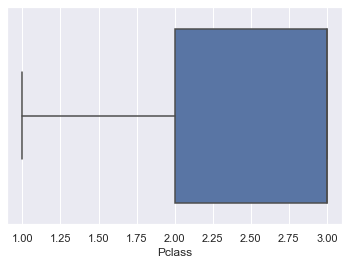

In [6]:
#Detecting outliers using Box plot
sns.boxplot(x=train_data['Pclass'])

#No outliers present in this data

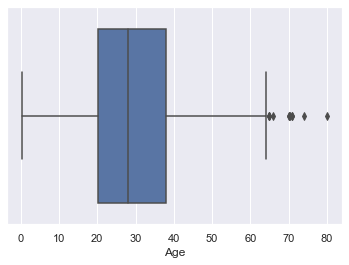

In [8]:
sns.boxplot(x=train_data['Age'])
#Some outliers are present in data

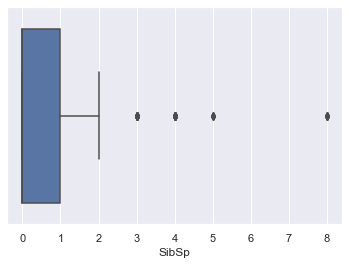

In [9]:
sns.boxplot(x=train_data['SibSp'])
#There are outliers in data

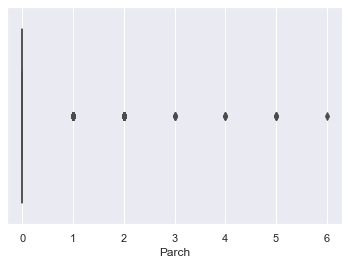

In [10]:
sns.boxplot(x=train_data['Parch'])

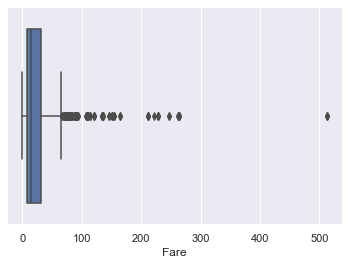

In [11]:
sns.boxplot(x=train_data['Fare'])

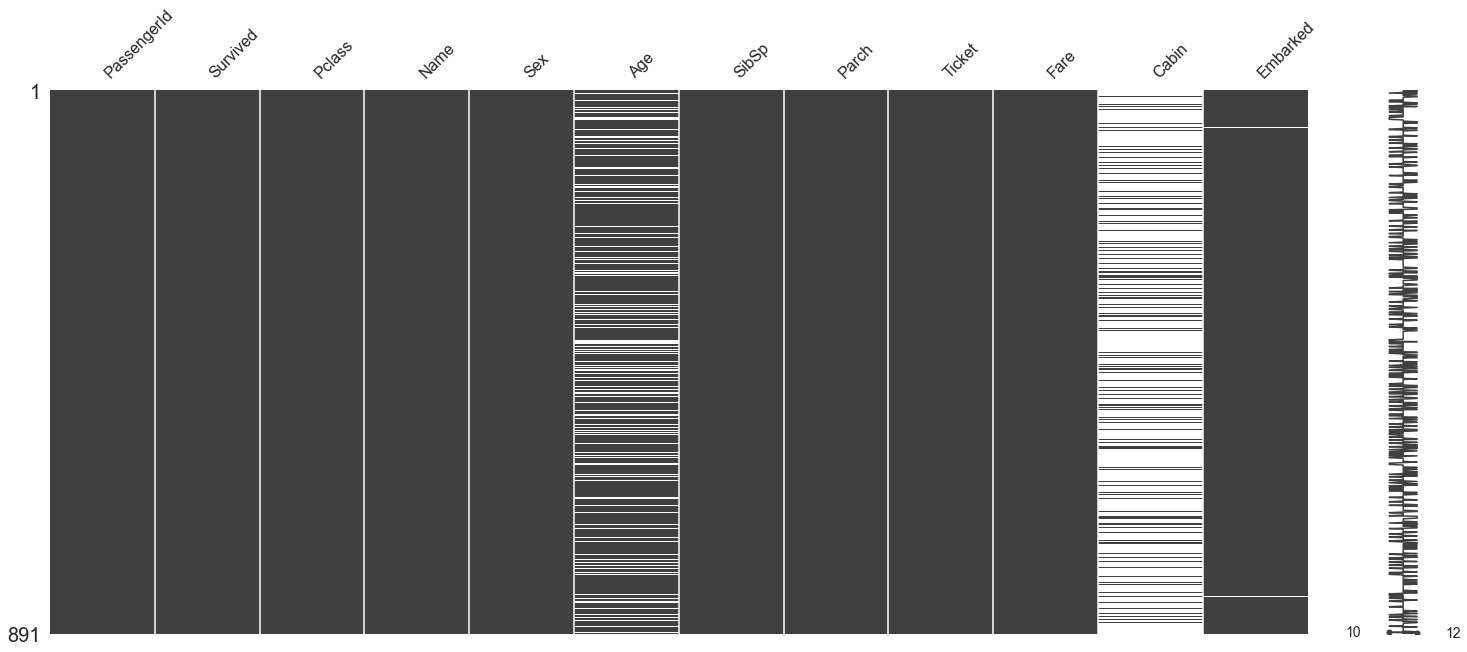

In [12]:
#Check for missing values
import missingno as msno
msno.matrix(train_data)

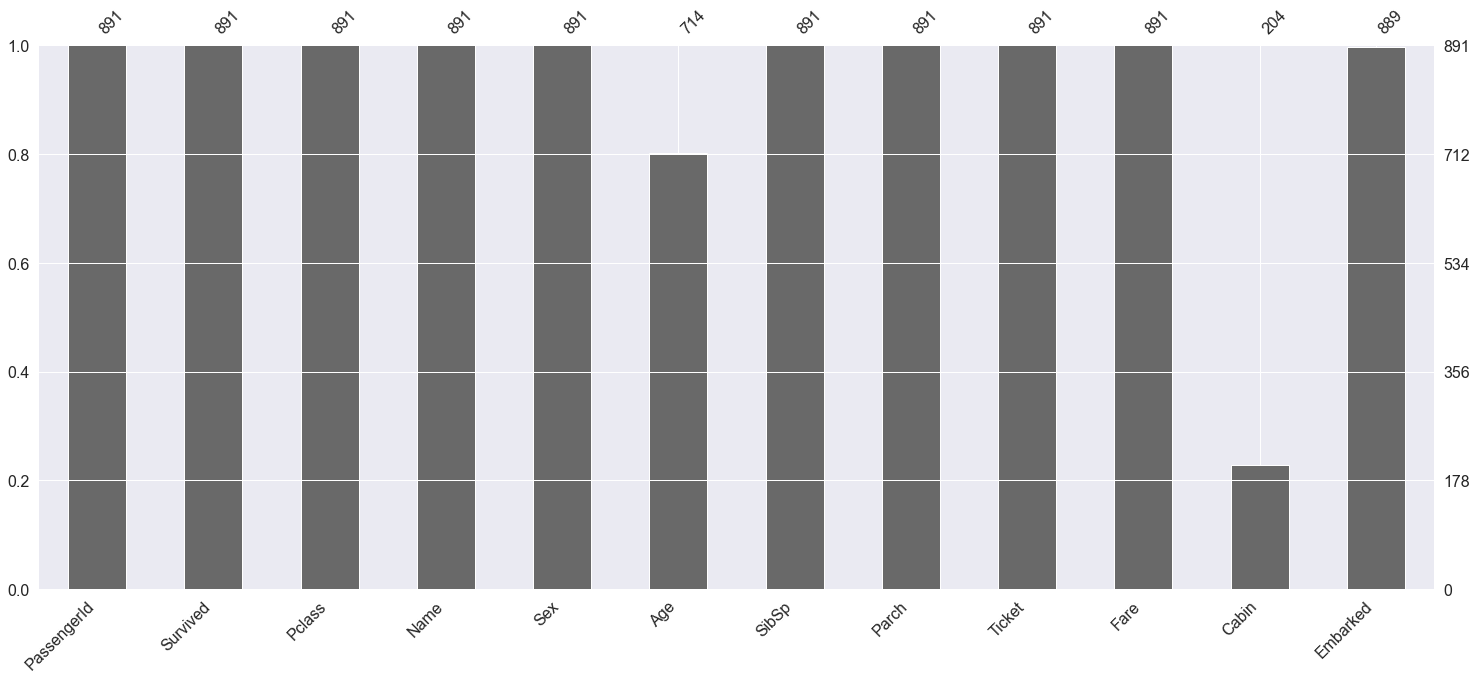

In [13]:
msno.bar(train_data)

In [14]:
#Drop cabin column as it has a high number of missing values
train_data = train_data.drop('Cabin', axis=1)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
#Exploratory data analysis
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#Replace the data in gender column. Create two new columns using one hot encoding.
gender_new = pd.get_dummies(train_data['Sex'], drop_first=False)
gender_new.head()

#Add this to original dataset and remove the Sex column
train_data = pd.concat([train_data, gender_new], axis=1)
train_data.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  female       891 non-null    uint8  
 12  male         891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(2)
memory usage: 78.4+ KB


In [18]:
train_data['male'] = train_data['male'].apply(pd.to_numeric)
train_data['female'] = train_data['female'].apply(pd.to_numeric)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  female       891 non-null    int64  
 12  male         891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [19]:
#Remove embarked column by one hot encoding
embarked_new = pd.get_dummies(train_data['Embarked'], drop_first=False)
embarked_new.head()
train_data = pd.concat([train_data, embarked_new], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1


In [20]:
#drop embarked column
#rename the columns
train_data.rename(columns={'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'}, inplace = True)
train_data = train_data.drop('Embarked', axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,female,male,Cherbourg,Queenstown,Southampton
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,1,0,0,1


In [21]:
train_data = train_data.drop('Sex', axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male,Cherbourg,Queenstown,Southampton
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [22]:
#drop null values
nulls = train_data.isnull().sum()
print("Nulls :" ,nulls)
#impute nulls using mean values initally and check the accuracy
train_data['Age'].fillna(int(train_data['Age'].mean()), inplace=True)

nulls = train_data.isnull().sum()
print("Nulls after imputation:" ,nulls)

Nulls : PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
female           0
male             0
Cherbourg        0
Queenstown       0
Southampton      0
dtype: int64
Nulls after imputation: PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
female         0
male           0
Cherbourg      0
Queenstown     0
Southampton    0
dtype: int64


In [23]:
#Divide the data in training and test data
from sklearn.model_selection import train_test_split
x = train_data.drop('Survived', axis=1)
x = x.drop("PassengerId", axis=1)
x = x.drop("Name", axis=1)
x = x.drop("Ticket", axis=1)
#x = x.drop("Sex", axis=1)
y = train_data['Survived']


In [24]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Cherbourg,Queenstown,Southampton
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.3)
#Using linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import r2_score

rmse_vw = r2_score(y_test, y_pred,multioutput='variance_weighted')
rmse_ua = r2_score(y_test, y_pred,multioutput='uniform_average')
rmse_ra = r2_score(y_test, y_pred,multioutput='raw_values')

print("RMSE(variance_weighted) for Linear Regression is :", rmse_vw)
print("RMSE(uniform_average) for Linear Regression is :", rmse_ua)
print("RMSE(raw_values) for Linear Regression is :", rmse_ra)

RMSE(variance_weighted) for Linear Regression is : 0.312850700676931
RMSE(uniform_average) for Linear Regression is : 0.312850700676931
RMSE(raw_values) for Linear Regression is : [0.3128507]


In [32]:
#Random Forest Classiifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, random_state=None, verbose=0)

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
y_pred_rfc = rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of RFC :", accuracy_rfc)

Accuracy of RFC : 0.7649253731343284


Random forest model has given an accuracy of 76%. We will save this model using Pickle. 

This model can directly be loaded and predictions can be made using test data

################# SAVE THE MODEL USING PICKLE ##################

In [35]:
import pickle

filename = 'finalized_model_rfc.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [36]:
with open("model.bin", 'wb') as f_out:
    pickle.dump(rfc, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

In [37]:
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

In [39]:
y_pred_rfc = model.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of RFC :", accuracy_rfc)

Accuracy of RFC : 0.7649253731343284
